## Task 1

In [1]:
# Import libraries
from imageio import imread, imwrite
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [2]:
# Read Selected Images
img = imread('landscape6.jpg')

In [3]:
# Getting shape of image
x, y, z = img.shape # You can see, that images are stored as 3-dimensional arrays, where 3rd dimension contains RGB description of a pixel.

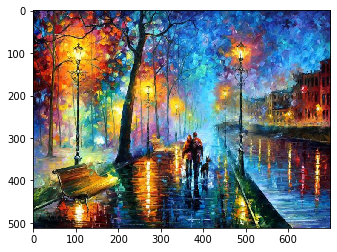

In [4]:
# Plotting obtained image
plt.imshow(img)

In [5]:
# converting image into 2D Array
features = img.reshape(x*y, z)
features.shape

(358400, 3)

In [6]:
# importing Kmeans from Scikit Learn
from sklearn.cluster import KMeans

In [7]:
# Clustering image
n_clusters = 15
k_means = KMeans(n_clusters=n_clusters)
k_means.fit(features)
cluster_centers = k_means.cluster_centers_
cluster_labels = k_means.labels_

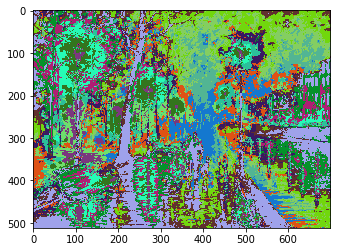

In [8]:
# https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa
compressed_image = ( cluster_centers[cluster_labels].reshape(x, y, z) * 255).astype(np.uint8)
plt.imshow(compressed_image)

In [9]:
imwrite('compressed_landscape6.jpg', compressed_image)

## Task 2

In [11]:
from numpy import genfromtxt

In [31]:
def conv(x):
    return x.replace(',', '.').encode()

elbow_data = genfromtxt((conv(x) for x in open("elbow.txt")), delimiter='\t') 

In [38]:
elbow_data[0]

array([-2.74771081,  3.57568039])

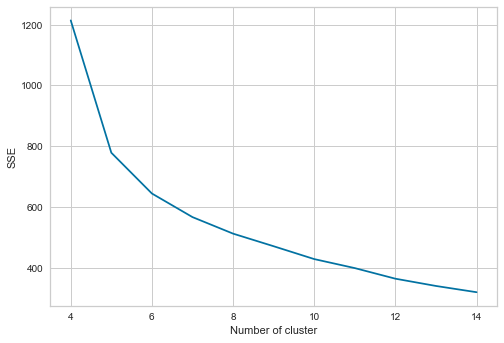

In [40]:
from sklearn.metrics import silhouette_score

sse = {}
for n_clusters in range(4,15):
    #iterating through cluster sizes
    kmeans = KMeans(n_clusters = n_clusters)
    clusters = kmeans.fit(elbow_data)
    sse[n_clusters] = clusters.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [10]:
"""
importing YellowBricks Library 
Yellowbrick extends the Scikit-Learn API to make model selection 
and hyperparameter tuning easier. Under the hood, it’s using Matplotlib.
""" 
from yellowbrick.cluster import KElbowVisualizer

/Users/larry/miniconda3/envs/mldm/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


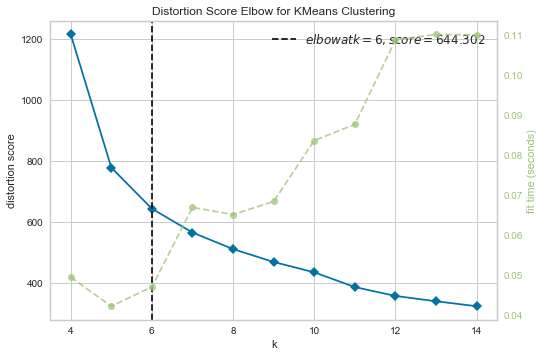

In [41]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(elbow_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Checking Optimal K for Task 1

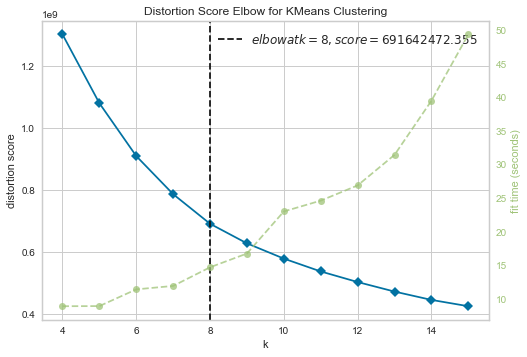

In [42]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,16))

visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Redoing Task 1 with optimal k=8

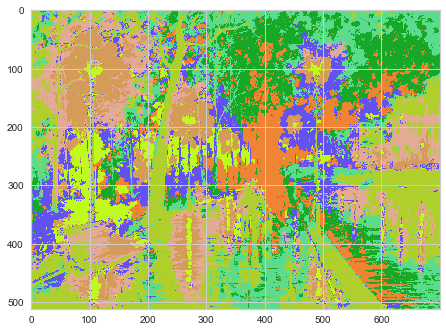

In [43]:
k_means = KMeans(n_clusters=8)
k_means.fit(features)
cluster_centers = k_means.cluster_centers_
cluster_labels = k_means.labels_

compressed_image = ( cluster_centers[cluster_labels].reshape(x, y, z) * 255).astype(np.uint8)
plt.imshow(compressed_image)

In [44]:
imwrite('optimal_k_compressed_landscape6.jpg', compressed_image)